In [3]:
#Sai Teja Sajja

#LGM_ADVANCED_LEVEL_TASK

#TASK-3 : Develop A Neural Network That Can Read Handwriting

'''
TensorFlow is an end-to-end open source platform for machine learning. 
It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push 
the state-of-the-art in ML and developers easily build and deploy ML powered applications.

Keras is an API designed for human beings, not machines. Keras follows best practices for 
reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions 
required for common use cases, and it provides clear & actionable error messages.
It also has extensive documentation and developer guides.
'''

'\nTensorFlow is an end-to-end open source platform for machine learning. \nIt has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push \nthe state-of-the-art in ML and developers easily build and deploy ML powered applications.\n\nKeras is an API designed for human beings, not machines. Keras follows best practices for \nreducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions \nrequired for common use cases, and it provides clear & actionable error messages.\nIt also has extensive documentation and developer guides.\n'

In [4]:
!pip install tensorflow


  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.0
    Uninstalling Keras-2.3.0:
      Successfully uninstalled Keras-2.3.0


In [5]:
!pip install keras==2.3.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.3.0 which is incompatible.



  Using cached Keras-2.3.0-py2.py3-none-any.whl (377 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [6]:
#Importing packages

In [1]:
# For manipulating the Image(represented in the form of array)
import numpy as np

#for building a model
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

# MNIST dataset available in
from keras.datasets import mnist

# For visualizing images
import matplotlib.pyplot as plt

In [8]:
#Load Dataset

'''
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.
It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.
The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9,
inclusively.

'''

'\nThe MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.\nIt is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.\nThe task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9,\ninclusively.\n\n'

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

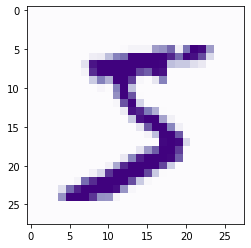

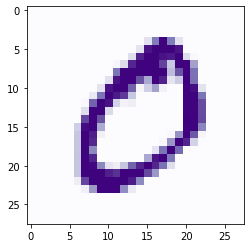

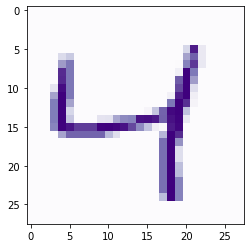

In [20]:
# plot first 3 images
test=x_train[100]
for i in range(3):
    plt.imshow(x_train[i], cmap='Purples')
    plt.show()

In [4]:
#Prepare Data

In [5]:

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
#Model Building

In [8]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) # Dropout, one form of regularization
model.add (Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add (MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add( Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0

In [9]:
#Batch Size of 128
batch_size = 128

#Total Epochs i am considering 5
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 49s 114ms/step - loss: 0.4078 - accuracy: 0.8726 - val_loss: 0.0935 - val_accuracy: 0.9740
Epoch 2/5
422/422 [==============================] - 43s 102ms/step - loss: 0.1359 - accuracy: 0.9582 - val_loss: 0.0657 - val_accuracy: 0.9818
Epoch 3/5
422/422 [==============================] - 45s 107ms/step - loss: 0.1030 - accuracy: 0.9683 - val_loss: 0.0557 - val_accuracy: 0.9853
Epoch 4/5
422/422 [==============================] - 46s 109ms/step - loss: 0.0874 - accuracy: 0.9733 - val_loss: 0.0461 - val_accuracy: 0.9873
Epoch 5/5
422/422 [==============================] - 46s 109ms/step - loss: 0.0762 - accuracy: 0.9760 - val_loss: 0.0412 - val_accuracy: 0.9882


In [ ]:
#Model Testing

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.039795126765966415
Test accuracy: 0.9865000247955322


In [ ]:
#Testing Model with User Input

In [23]:

# Package used for loading images
from keras.preprocessing.image import load_img

# Used to convert image to array
from keras.preprocessing.image import img_to_array

def load_image(imagePath):
    
    # load the image
    
    img = load_img(imagePath, grayscale=True, target_size=(28, 28))
    
    # convert to array
    plt.imshow(img,cmap="Purples")
    plt.title("The Actual Image")
    img = img_to_array(img)
    
    # reshape into a single sample 
    img = img.reshape(1, 28, 28, 1)
    return img

AttributeError: 'Sequential' object has no attribute 'predict_classes'

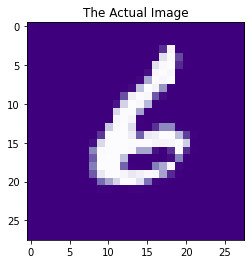

In [24]:
img = load_image('test.png')
digit = model.predict_classes(img)
print("Predicted Image is ",digit[0])

Predicted Image is  0


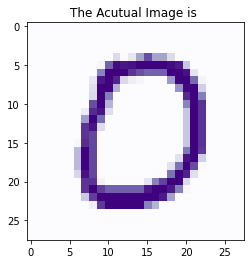

In [19]:
image_index = 10
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Purples')
plt.title("The Acutual Image is ")
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Image is ",pred.argmax())